In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

from FaaSEnv import FaaSEnv

In [2]:
env = FaaSEnv()
# env = DummyVecEnv([lambda: env])

model = PPO(
    "MlpPolicy",
    env=env,
    n_steps=1024,
    batch_size=64,
    gae_lambda=0.98,
    gamma=0.999,
    n_epochs=4,
    ent_coef=0.01,
    verbose=0,
    tensorboard_log="./tensorboard/"
)

=> Loading checkpoint
=> Loading success


In [3]:
model.learn(total_timesteps=1e6)

In [4]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=1, render=False)
env.close()
print(mean_reward, std_reward)

29.59959089756012 0.0


D:\Program Files\anaconda3\envs\pytorch\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


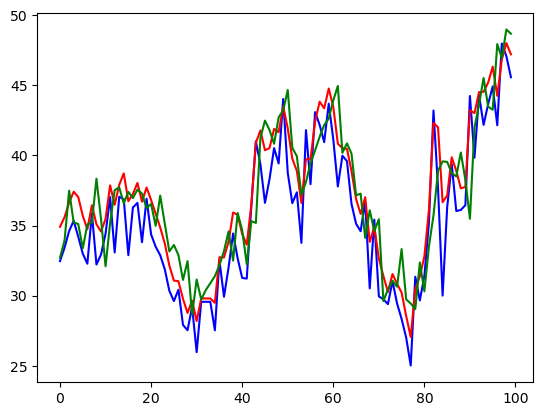

In [5]:
from utils import denormalize

real = []
ppo = []
lstm = []

obs = env.reset()
for _ in range(100):
    action, state = model.predict(observation=obs)
    ppo.append(denormalize(action))
    obs, reward, done, info = env.step(action)
    real.append(denormalize(obs[0][7]))
    lstm.append(denormalize(obs[2][0]))
    env.render()

from matplotlib import pyplot as plt

plt.plot(real, 'b', label='real')
plt.plot(lstm, 'r', label='lstm')
plt.plot(ppo, 'g', label='ppo')

In [6]:
model.save("./model/ppo.pkl")